# **Sesión 05: Distribuciones muestrales y técnicas de evaluación de modelos**

***
***
***

## **Prework**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
serie_1 = pd.Series([61, 88, 89, 89, 90, 92, 93, 94, 98, 98, 101, 102, 105, 108, 109, 113, 114, 115, 120, 138])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


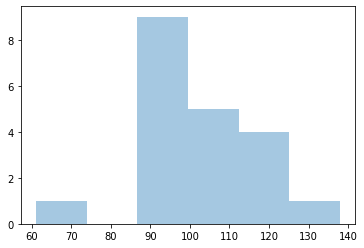

In [ ]:
sns.distplot(serie_1, kde=False, norm_hist=False);

In [ ]:
serie_1.mean()

100.85

In [ ]:
serie_1.median()

99.5

In [ ]:
serie_1.std() / np.sqrt(len(serie_1))

3.538714455844099

In [ ]:
means = []
medians = []

for _ in range(100000):
    sample = serie_1.sample(frac=0.9, replace=True)
    means.append(sample.mean())
    medians.append(sample.median())

In [ ]:
serie_means = pd.Series(means)
serie_medians = pd.Series(medians)

serie_means.std()

3.6593970848973787

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


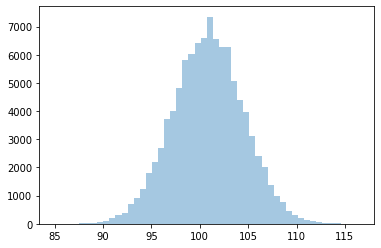

In [ ]:
sns.distplot(means, kde=False, norm_hist=False);

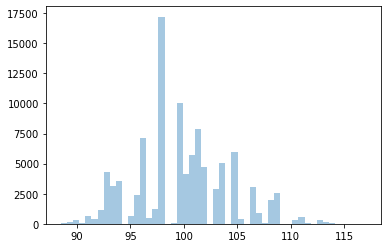

In [ ]:
sns.distplot(medians, kde=False, norm_hist=False);

In [ ]:
serie_means.std()

3.6593970848973787

In [ ]:
serie_medians.std()

4.438649912364169

In [ ]:
mean_bottom = serie_means.quantile(0.025)
mean_top = serie_means.quantile(0.975)

print(f'Intervalo de 95% de confianza de la media: {mean_bottom} < {serie_1.mean()} < {mean_top}')

Intervalo de 95% de confianza de la media: 93.61111111111111 < 100.85 < 108.0


In [ ]:
median_bottom = serie_medians.quantile(0.025)
median_top = serie_medians.quantile(0.975)

print(f'Intervalo de 95% de confianza de la mediana: {median_bottom} < {serie_1.median()} < {median_top}')

Intervalo de 95% de confianza de la mediana: 92.0 < 99.5 < 109.0


In [ ]:
serie_2 = pd.Series([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 5, 6, 7, 8, 8, 7, 6, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 7, 8, 8, 6, 3, 4])

In [ ]:
means = []

for _ in range(100000):
    sample = serie_2.sample(frac=0.2, replace=True)
    means.append(sample.mean())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


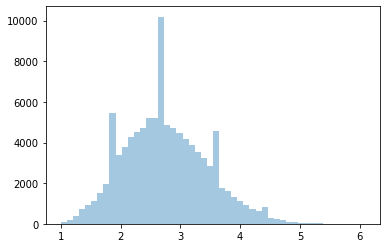

In [ ]:
sns.distplot(means, kde=False, norm_hist=False);

***
***
***

## **Work**


# Sesión 05: Distribuciones muestrales y técnicas de evaluación de modelos

## :dart: Objetivos

- Distinguir la diferencia entre población y muestra.
- Entender el concepto de 'sesgos' y por qué es tan importante estar conscientes de ellos.
- Aprender el concepto de muestreo aleatorio y cómo puede protegernos parcialmente de los sesgos.
- Utilizar la técnica 'bootstrap' como medio para explorar la distribución muestral de una estadística.
- Crear y utilizar histogramas, errores estándar e intervalos de confianza para evaluar la incertidumbre de una medida estadística.
- Utilizar técnicas para evitar sesgos en el entrenamiento de modelos, como la división de datasets y la validación cruzada.

## 📂 Contenido

<ins>Poblaciones y muestras</ins>

En un estudio estadístico la *población* es el grupo completo acerca del cual se pretende obtener cierta información. Una *muestra* es un subconjunto de esa población.

Es muy importante antes de empezar un análisis estadístico tener muy claro cuáles son los parámetros que definen a nuestra población. Esos parámetros pueden ser geográficos, étnicos, de género, profesionales, etc.

Una de las tareas que realizamos como científicos de datos es la de definir poblaciones, obtener muestras de datos de estas poblaciones, y encontrar procedimientos a través de los que podamos encontrar información útil que pueda ser aplicable a una gran parte de la población. Dado que muchas veces tener datos concisos de **toda** la población es muy difícil, costoso o hasta imposible, debemos aprender a trabajar con muestras de manera efectiva.

Platiquemos un poco acerca de:

1. ¿Cómo definir poblaciones?
2. ¿A qué retos nos enfrentamos cuando definimos poblaciones?
3. ¿Cuáles pueden ser las consecuencias de definir incorrectamente a una población?
4. ¿Cómo generalizamos información de una muestra a una población?
5. ¿Qué problemas pueden surgir en este proceso de generalización?
6. ¿Cómo podemos evitar algunos de estos problemas o aunque sea minimizarlos?

---

<ins>Sesgos en nuestros datos</ins>

Una de las dificultades a las que nos enfrentamos cuando trabajamos con muestras de datos es que hay una alta probabilidad de que nuestros datos estén sesgados. Esto quiere decir que tienen una tendencia que no refleja la realidad tal y como es.

Los sesgos son muy peligrosos. Dificultan y hasta imposibilitan la obtención de información útil. Cuando nuestros datos están sesgados, la información que obtengamos no puede ser generalizada  al resto de la población, puesto que no refleja la realidad como es, sólo una perspectiva de ella.

Entrenar modelos predictivos y clasificatorios utilizando datos sesgados puede resultar en enormes e inaceptables injusticias.

Como científicos de datos debemos de pensar y estar atentos a los sesgos de nuestros datos, no solamente porque distorsionan nuestros análisis, sino porque tenemos la responsabilidad de llevar a cabo nuestra profesión éticamente.

Platiquemos un poco acerca de:

1. ¿De dónde surgen los sesgos en nuestros datos? ¿Cómo llegan ahí?
2. ¿A qué problemas podemos enfrentarnos cuando hay sesgos en nuestros datos?
3. ¿Qué podemos hacer para evitar sesgos en nuestros datos?
4. ¿De qué manera dañan a la sociedad estos sesgos?
5. ¿Qué papel juegan los científicos de datos en la eliminación de estos sesgos?

---



<ins>Distribuciones muestrales de estadísticas y Bootstrap</ins>

Para este momento seguramente ya te habrás percatado de que las medidas estadísticas que hemos aprendido a hasta ahora no son infalibles. Cada vez que tomamos una medida estadística, existe cierta incertidumbre alrededor de ella. ¿Qué hubiera pasado si nuestra muestra fuera ligeramente distinta? ¿Nuestra medida se mantendría igual o cambiaría?

Dado que normalmente no es posible regresar al origen de los datos para adquirir más muestras, existen ciertos procedimientos que podemos realizar para determinar el nivel de incertidumbre que existe en nuestras medidas estadísticas.

Una de estas técnicas es el bootstrapping. Veamos cómo funciona.

>

[**`Ejemplo 1`**](Ejemplo-01/bootstrap.ipynb)
[**`Reto 1`**](Reto-01/bootstrap.ipynb)

---

## Ejemplo 1: Bootstrap

### 1. Objetivos:
    - Aprender el concepto de muestreo randomizado y su utilidad
    - Aprender el algoritmo de bootstrap paso a paso
    - Aprender a graficar distribuciones muestrales
 
---
    
### 2. Desarrollo:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### a) Muestreo aleatorio o randomizado

Una de las maneras en las que normalmente se evitan los sesgos a la hora de tomar muestras es a través del muestreo aleatorio o randomizado. Esto significa crear una muestra a partir de una población o de otra muestra eligiendo elementos del conjunto original aleatoriamente. Cada elemento tiene las mismas posiblidades de ser elegido para la nueva muestra, a menos que haya una buena razón para hacerlo distinto.

Con este procedimiento intentamos evitar el sesgo de selección.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BEDU2023F3/Remoto_Datasets/Remoto diabetes-clean.csv', index_col=0)

df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Por ejemplo, vamos a tomar algunas muestras de la variable 'glucose'. Un muestreo aleatorio puede tomarse sin reposición, lo cual significa que cada vez que un elemento se toma de la muestra original, no se regresa a la muestra original. Con cada muestreo entonces nuestra muestra original se hace más pequeña, lo cual en realidad cambia las probabilidades de elegir las muestras restantes:

In [ ]:
df['glucose'].sample(n=20, replace=False)

253     86
478    126
541    128
140    128
148    147
219    112
433    139
44     159
301    144
139    105
598    173
718    108
36     138
258    193
467     97
272    122
181    119
639    100
445    180
255    113
Name: glucose, dtype: int64

Tambíen podemos tomar elementos con reposición, donde regresamos cada elemento después de tomar la muestra. Esto quiere decir que en cada toma tenemos la misma probabilidad de elegir cualquiera de los elementos y además el remuestreo puede incluir elementos repetidos:

In [ ]:
df['glucose'].sample(frac=0.1, replace=True)

231    134
423    115
191    123
15     100
6       78
      ... 
157    109
641    128
47      71
89     107
298    100
Name: glucose, Length: 77, dtype: int64

### b) Bootstrap

El Bootstrap nos sirve para generar lo que se llaman distribuciones muestrales de estadísticas. Esto es un histograma de una medida estadística cuantificada utilizando un gran número de remuestreos. ¿Para qué queremos hacer esto? Para calcular la incertidumbre de nuestra medida estadística. Dado que no podemos regresar a la fuente original, vamos a crear 'nuevas muestras' a partir de la que tenemos, con el fin de simular qué pasaría si regresáramos a la fuente original a tomar más muestras. El algoritmo es el siguiente:

1. Toma un elemento de tu conjunto de datos de manera aleatoria con reposición.
2. Repite el paso 1 `n` veces (entre más grande tu `n`, más preciso tu cálculo; pero no tiene sentido que sea tan grande como el tamaño de tu muestra).
3. Toma la medida estadística que te interese de tus valores remuestreados.
4. Repite los pasos 1 a 3 `R` veces (entre mayor sea `R`, más preciso tu cálculo).
5. Utiliza las medidas obtenidas para:
  a) Generar un histograma o boxplot
  b) Calcular el error estándar
  c) Calcular un intervalo de confianza
  
Nuestro cálculo va a resultar más exacto si `n` y `R` son lo más grandes posibles. Pero el boostrapping es un proceso que toma mucho tiempo y poder computacional, así que si nuestro dataset es muy grande habrá que disminuir estos valores hasta que el procedimiento completo tome una cantidad decente de tiempo.

Vamos a realizar estos pasos y llevar a cabo el inciso *a* del paso 5:

In [ ]:
glucose = df['glucose']

means = []

for i in range(100_000):
    sample = glucose.sample(n=50, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


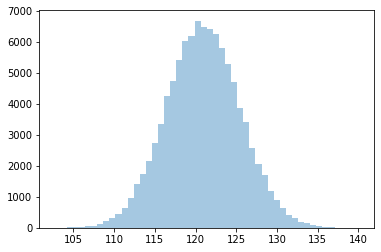

In [ ]:
sns.distplot(serie_means, kde=False, norm_hist=False);

### c) Teorema del límite central

Existe un teorema matemático llamado Teorema del Limíte Central que establece que las distribuciones muestrales de estadísticas van a tender hacia la normalidad. Ésta no es una regla absoluta, pero se cumple en muchos casos. En nuestro ejemplo podemos calcular qué tan cerca de la normalidad están nuestros promedios muestrales: 

In [ ]:
serie_means.skew()

0.014019943502251707

In [ ]:
serie_means.kurtosis()

0.008314917365552343

Como puedes ver, en este caso se cumple con mucha precisión. Entre más pequeñas sean nuestras remuestras, normalmente la curtosis aumenta.

Vamos a preguntarnos:

1. ¿Por qué creen que la curtosis aumente si nuestras remuestras son más pequeñas?
2. ¿Por qué la teoría del límite central suele cumplirse?
3. ¿Qué significa que la distribución muestral de una medida estadística **no** sea normal? ¿Cómo podemos interpretar ese fenómeno?

## Reto 1: Bootstrap

### 1. Objetivos:
    - Practicar la aplicación del algoritmo de boostrap
    - Practicar graficar los resultados del boostrap
 
---
    
### 2. Desarrollo:

En este Reto vamos a aplicar la técnica de bootstrap para explorar distribuciones muestrales de estadísticas. Para este Reto puedes elegir cualquiera de los datasets que vienen incluidos en este módulo. Ha llegado el momento de que te dejes guiar por tu curiosidad. Puedes ver una lista de todo lo que hay disponible [acá](../../Datasets/Readme.md).

Elige un dataset que tenga alguna variable numérica que te parezca interesante. Ahora, vamos a realizar algunos análisis sobre esa variable. Recuerda escribir tu análisis de manera ordenada, ya que si lo deseas habrá oportunidad de presentar tus hallazgos al grupo. Lleva a cabo los siguientes pasos:

1. Primero saca tus estimados de locación y dispersión.
2. Después, grafica tu variable usando un histograma y un boxplot, para que tengas una idea más detallada de su distribución.
3. Si consideras que hay valores atípicos, lidia con ellos de la manera que te parezca más adecuada.
4. Ahora vamos a ver qué tanta incertidumbre y sesgo hay en tus hallazgos. Vamos a aplicar la técnica de bootstrap 3 veces:

  a) Realiza 100 000 remuestreos, cada uno de 5 elementos. Obtén la medida estadística que te interese de cada muestra y guarda los resultados en una lista.
  
  b) Repite el mismo proceso, pero esta vez con remuestreos con longitud de 20% del total de los datos.
  
  c) Repite una vez más, pero esta vez cada nueva muestra tendrá una longitud de 90% de la original.
  
5. Grafica cada una de las listas resultantes en un histograma.
6. Obtén la asimetría y curtosis de cada una y compáralas entre ellas. ¿Cuál es más similar a una distribución normal? ¿Qué diferencias tienen entre ellas?

In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BEDU2023F3/Remoto_Datasets/Remoto diabetes-clean.csv', index_col=0)

df.sample(6)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
653,2,120,54,0,0,26.8,0.455,27,0
540,8,100,74,40,215,39.4,0.661,43,1
749,6,162,62,0,0,24.3,0.178,50,1
602,1,124,74,36,0,27.8,0.100,30,0
105,1,126,56,29,152,28.7,0.801,21,0
314,7,109,80,31,0,35.9,1.127,43,1


In [ ]:
df_filtered = df.drop(columns=['outcome'])
df_filtered.head(10)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [ ]:
# Si consideras que hay valores atípicos, lidia con ellos de la manera que te parezca más adecuada.
# Se eliminarán todas las filas que contengan por lo menos un valor 0

df_filtered_no_0 = df_filtered.loc[(df_filtered != 0).all(axis=1), :]
df_filtered_no_0.iloc[1]

pregnancies                    3.000
glucose                       78.000
blood_pressure                50.000
skin_thickness                32.000
insulin                       88.000
bmi                           31.000
diabetes_pedigree_function     0.248
age                           26.000
Name: 6, dtype: float64

In [ ]:
df_filtered_no_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 3 to 765
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 336 non-null    int64  
 1   glucose                     336 non-null    int64  
 2   blood_pressure              336 non-null    int64  
 3   skin_thickness              336 non-null    int64  
 4   insulin                     336 non-null    int64  
 5   bmi                         336 non-null    float64
 6   diabetes_pedigree_function  336 non-null    float64
 7   age                         336 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 23.6 KB


In [ ]:
df = df_filtered_no_0.sample(5)
df

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
71,5,139,64,35,140,28.6,0.411,26
650,1,91,54,25,100,25.2,0.234,23
147,2,106,64,35,119,30.5,1.400,34
648,11,136,84,35,130,28.3,0.260,42
135,2,125,60,20,140,33.8,0.088,31


In [ ]:
# 1. Primero saca tus estimados de locación y dispersión.

blood_pressure = df['blood_pressure']
print(f'La media de blood_pressure es: {blood_pressure.mean()}')
print(f'La mediana de blood_pressure es: {blood_pressure.median()}')
print(f'La media truncada de blood_pressure es: {stats.trim_mean(blood_pressure, 0.1)}')
print(f'La desviación estándar de blood_pressure es: {blood_pressure.std()}')
print(f'El rango de blood_pressure es: {blood_pressure.max()-blood_pressure.min()}')


La media de blood_pressure es: 65.2
La mediana de blood_pressure es: 64.0
La media truncada de blood_pressure es: 65.2
La desviación estándar de blood_pressure es: 11.278297743897348
El rango de blood_pressure es: 30


count     5.000000
mean     65.200000
std      11.278298
min      54.000000
25%      60.000000
50%      64.000000
75%      64.000000
max      84.000000
Name: blood_pressure, dtype: float64


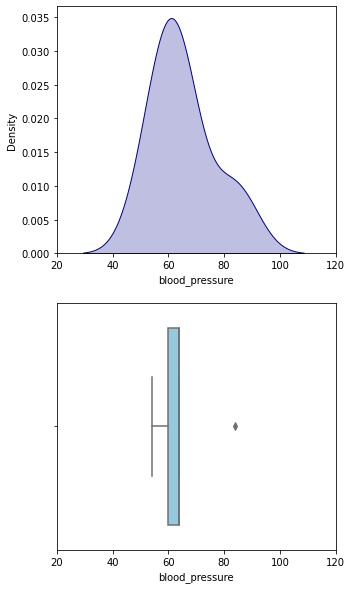

In [ ]:
# 2. Después, grafica tu variable usando un histograma y un boxplot, para que tengas una idea más detallada de su distribución.
# Explorar variable

datos_blood_pressure = df['blood_pressure']

print(datos_blood_pressure.describe())
fig, (ax1,ax2) = plt.subplots(figsize = (5,10), nrows=2)

sns.kdeplot(x=datos_blood_pressure, color = 'darkblue', fill = True, ax = ax1)
sns.boxplot(x=datos_blood_pressure, color = 'skyblue', ax = ax2)

ax1.set_xlim(xmin = 20, xmax = 120)
ax2.set_xlim(xmin = 20, xmax = 120)

plt.show()

Por decisión propia, voy a continuar sin modificar los datos

In [ ]:
# Ahora vamos a ver qué tanta incertidumbre y sesgo hay en tus hallazgos. Vamos a aplicar la técnica de bootstrap 3 veces:

def bootstrap(series, size, iter = 100_000):
    lista_means = []
    if size > 1:
        for i in range(iter):
            sample = series.sample(n = size, replace = True)
            lista_means.append(sample.mean())
        return pd.Series(lista_means)
    else:
        n_datos = int(len(series) * size)
        for i in range(iter):
            sample = series.sample(n = n_datos, replace = True)
            lista_means.append(sample.mean())
        return pd.Series(lista_means)

In [ ]:
# a) Realiza 100 000 remuestreos, cada uno de 5 elementos. Obtén la medida estadística que te interese de cada muestra y guarda los resultados en una lista.
# b) Repite el mismo proceso, pero esta vez con remuestreos con longitud de 20% del total de los datos.
# c) Repite una vez más, pero esta vez cada nueva muestra tendrá una longitud de 90% de la original.

series_means_5 = bootstrap(series = datos_blood_pressure, size = 5)
series_means_20_perc = bootstrap(series = datos_blood_pressure, size = 0.2)
series_means_90_perc = bootstrap(series = datos_blood_pressure, size = 0.9)

<AxesSubplot:ylabel='Count'>

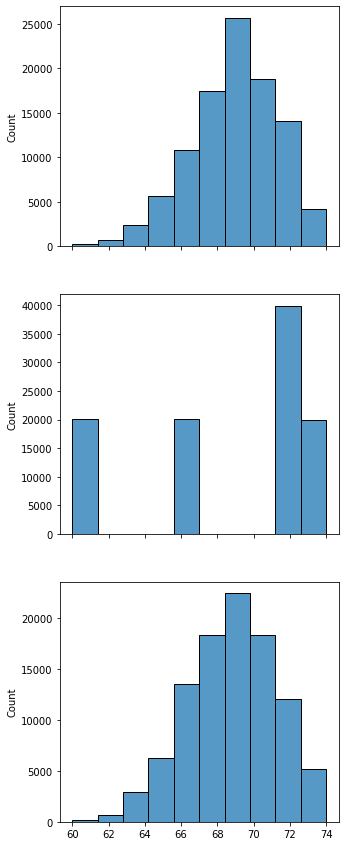

In [ ]:
# Grafica cada una de las listas resultantes en un histograma.
# Obtén la asimetría y curtosis de cada una y compáralas entre ellas. ¿Cuál es más similar a una distribución normal? ¿Qué diferencias tienen entre ellas?

# Graficar resultados e información de los bootstrap
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize = (5,15), sharex=True)

sns.histplot(x = series_means_5, bins = 10,
             ax = ax1)
sns.histplot(x = series_means_20_perc, bins = 10, 
             ax = ax2)
sns.histplot(x = series_means_90_perc, bins = 10,
             ax = ax3)


In [ ]:
# Obtener la asimetría y curtosis 
print(f'-----------------'*10)
print(f"Media: {round(series_means_5.mean(),5)}")
print(f"Kurtosis: {round(series_means_5.kurtosis(),5)}")
print(f"Asimetria: {round(series_means_5.skew(),5)}")
print(f"Rango: {round(series_means_5.max() - series_means_5.min(),5)}")
print(f"Error estandar: {round(series_means_5.std(),5)}")
print(f"Proporcion de\nerror estandar: {round(100 * (series_means_5.std()/(series_means_5.max() - series_means_5.min())),5)}%")
print(f'-----------------'*10)

print(f"Media: {round(series_means_20_perc.mean(),5)}")
print(f"Kurtosis: {round(series_means_20_perc.kurtosis(),5)}")
print(f"Asimetria: {round(series_means_20_perc.skew(),5)}")
print(f"Rango: {round(series_means_20_perc.max() - series_means_20_perc.min(),5)}")
print(f"Error estandar: {round(series_means_20_perc.std(),5)}")
print(f"Proporcion de\nerror estandar: {round(100 * (series_means_20_perc.std()/(series_means_20_perc.max() - series_means_20_perc.min())),5)}%")
print(f'-----------------'*10)

print(f"Media: {round(series_means_90_perc.mean(),5)}")
print(f"Kurtosis: {round(series_means_90_perc.kurtosis(),5)}")
print(f"Asimetria: {round(series_means_90_perc.skew(),5)}")
print(f"Rango: {round(series_means_90_perc.max() - series_means_90_perc.min(),5)}")
print(f"Error estandar: {round(series_means_90_perc.std(),5)}")
print(f"Proporcion de\nerror estandar: {round(100 * (series_means_90_perc.std()/(series_means_90_perc.max() - series_means_90_perc.min())),5)}%")
print(f'-----------------'*10)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Media: 65.18331
Kurtosis: -0.05064
Asimetria: 0.44571
Rango: 30.0
Error estandar: 4.52066
Proporcion de
error estandar: 15.06888%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Media: 65.18964
Kurtosis: -0.25765
Asimetria: 0.99623
Rango: 30.0
Error estandar: 10.07196
Proporcion de
error estandar: 33.57321%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Media: 65.1942
Kurtosis: -0.08551
Asimetria: 0.4953
Rango: 30.0
Error estandar: 5.04131
Proporcion de
error estandar: 16.80436%
--------------------------------------------------------------------------------------------------

***
***


<ins>Error estándar e intervalos de confianza</ins>

Ya que hemos tenemos una Serie con las medidas estadísticas tomadas de cada remuestra, además de revisar la distribución podemos hacer un par de cosas más.

El error estándar nos dice qué tan dispersas están nuestras medidas estadísticas. Esta es una de las maneras de cuantificar incertidumbre.

Los intervalos de confianza son una manera de mostrar la incertidumbre de una manera muy fácil de comprender, suelen utilizarse en ciencia de datos para establecer qué tan precisa es nuestra medida estadística.

>

[**`Ejemplo 2`**](Ejemplo-02/error_estandar_e_intervalos_de_confianza.ipynb)
[**`Reto 2`**](Reto-02/error_estandar_e_intervalos_de_confianza.ipynb)

---

## Ejemplo 2: Error estándar e intervalos de confianza

### 1. Objetivos:
    - Aprender a obtener e interpretar el error estándar y los intervalos de confianza
 
---
    
### 2. Desarrollo:

### a) Error estándar

Recordarás que la desviación estándar es una medida de dispersión de nuestros datos. Bueno, pues el error estándar es la desviación estándar de nuestra serie de medidas estadísticas:

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('/content/drive/MyDrive/BEDU2023F3/Remoto_Datasets/Remoto diabetes-clean.csv', index_col=0)

df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
glucose = df['glucose']

means = []

for i in range(100_000):
    sample = glucose.sample(n=50, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

In [35]:
print(f'Error estandar: {serie_means.std()}')

Error estandar: 4.511484178688396


Recuerda que para poder interpretar correctamente la desviación estándar tienes que saber un poco acerca del rango y distribución de tus datos:

In [36]:
print(f'Valor mínimo: {serie_means.min()}')
print(f'Valor máximo: {serie_means.max()}')
print(f'Rango: {serie_means.max() - serie_means.min()}')

Valor mínimo: 101.68
Valor máximo: 142.48
Rango: 40.79999999999998


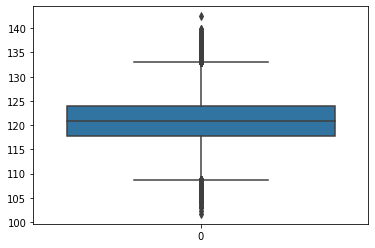

In [37]:
sns.boxplot(serie_means);

Vamos a preguntarnos:

1. ¿Cómo podemos interpretar la desviación estándar? ¿Qué implica una mayor o menor desviación estándar?
2. ¿Por qué necesitamos saber el rango de nuestros datos para interpretar correctamente la desviación estándar?
3. ¿En este caso específico qué significa la desviación estándar que obtuvimos?

### b) Intervalos de confianza

Los intervalos de confianza son una manera de cuantificar la incertidumbre que existe en nuestra medida estadística. Si pudiéramos regresar a nuesta fuente original a tomar más muestras, el intervalo de confianza sería el intervalo numérico en el cual podemos asegurar con cierto nivel de seguridad que caería nuestra nueva medición estadística.

Para obtener un intervalo de 95% de confianza, por ejemplo, tenemos que tomar nuestro histograma, removerle 2.5% de valores al principio y al final, y obtener los nuevos valores mínimo y máximo. De esta manera el 95% de los valores originales quedan dentro de este nuevo intervalo.

Podemos obtener nuestro intervalo de confianza utilizando cuantiles:

In [38]:
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)

Podemos escribir nuestro intervalo de confianza de dos maneras distintas:

In [39]:
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {glucose.mean()} < {limite_superior}')

Intervalo de 95% confianza de la media: 112.06 < 120.89453125 < 129.74049999999988


In [40]:
mean_of_intervals = ((glucose.mean() - limite_inferior) + (limite_superior - glucose.mean())) / 2

print(f'Intervalo de 95% confianza de la media: {glucose.mean()} +/- {mean_of_intervals}')

Intervalo de 95% confianza de la media: 120.89453125 +/- 8.84024999999994


Podemos visualizar estos límites también:

<ipython-input-41-5881df1d38d1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie_means, kde=False, norm_hist=False)


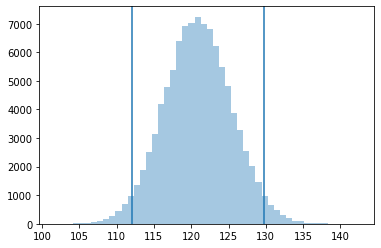

In [41]:
sns.distplot(serie_means, kde=False, norm_hist=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);

## Reto 2: Error estándar e intervalos de confianza

### 1. Objetivos:
    - Aprender a calcular e interpretar errores estándar e intervalos de confianza
 
---
    
### 2. Desarrollo:

Para este Reto de nuevo podrás elegir el dataset de tu agrado. Elige un dataset o una variable distinta que la del Reto anterior. Recuerda ordenar y explicar bien tu análisis para que sea comprensible para los demás. Una vez que hayas elegido un dataset y una variable que te parezcan interesantes, realiza los siguientes pasos:

1. Primero explora tu variable con los métodos tradicionales: estimados de locación y dispersión, histograma, etc.
2. Ahora usa la técnica de bootstrap para obtener la distribución muestral de la media y de la mediana de tu variable. Elige los parámetros más adecuados para el bootstrap basándote en los resultados obtenidos en el Reto anterior.
3. Grafica la distribución muestral de la media y la mediana.
4. Ahora, obtén el error estándar de ambas medidas estadísticas. Utiliza el mínimo, el máximo y el rango para contextualizar tu error estándar y saber qué tan grande o pequeño es.
5. Ahora, para cada medida estadística obtén los intervalos de confianza de 90%, 95% y 99%. Compara los resultados.
6. Comparte tus hallazgos con tus compañeros.

In [42]:
def intervalo_de_confianza(series, confianza = 0.95):
    alpha = round((1-confianza)/2,5)
    limite_inf = series.quantile(alpha)
    limite_sup = series.quantile(1 - alpha)
    print(f"Intervalo de {confianza * 100}% confianza de la media: {limite_inf} < {series.mean()} < {limite_sup}")

In [44]:
print("Para el muestreo de 5 elementos")
intervalo_de_confianza(series = series_means_5, confianza=0.90)
intervalo_de_confianza(series = series_means_5, confianza=0.95)
intervalo_de_confianza(series = series_means_5, confianza=0.99)

print("\nPara el muestreo de 20%")
intervalo_de_confianza(series = series_means_20_perc, confianza=0.90)
intervalo_de_confianza(series = series_means_20_perc, confianza=0.95)
intervalo_de_confianza(series = series_means_20_perc, confianza=0.99)

print("\nPara el muestreo de 90%")
intervalo_de_confianza(series = series_means_90_perc, confianza=0.90)
intervalo_de_confianza(series = series_means_90_perc, confianza=0.95)
intervalo_de_confianza(series = series_means_90_perc, confianza=0.99)

Para el muestreo de 5 elementos
Intervalo de 90.0% confianza de la media: 9.7 < 10.4215575 < 11.26
Intervalo de 95.0% confianza de la media: 9.6 < 10.4215575 < 11.44
Intervalo de 99.0% confianza de la media: 9.42 < 10.4215575 < 11.780000000000001

Para el muestreo de 20%
Intervalo de 90.0% confianza de la media: 10.32601880877743 < 10.423030112852667 < 10.521734587251828
Intervalo de 95.0% confianza de la media: 10.307523510971787 < 10.423030112852667 < 10.54075235109718
Intervalo de 99.0% confianza de la media: 10.27115987460815 < 10.423030112852667 < 10.577952455590388

Para el muestreo de 90%
Intervalo de 90.0% confianza de la media: 10.376685198054204 < 10.422957913713226 < 10.469457956914523
Intervalo de 95.0% confianza de la media: 10.368033066944635 < 10.422957913713226 < 10.478410933518647
Intervalo de 99.0% confianza de la media: 10.350312717164698 < 10.422957913713226 < 10.495865242066252


***
***

<ins>Técnicas de evaluación de modelos</ins>

Así como podemos tener sesgos e incertidumbre en nuestras medidas estadísticas, también nos puede pasar lo mismo con los modelos predictivos que entrenamos.

Hay varias formas en las que podemos encontrar este tipo de problemas al entrenar modelos predictivos o clasificatorios. Aquí vamos a hablar de dos de ellas:

1. A veces puede suceder que los datos que tenemos ya tienen de por sí un sesgo incluido. Este sesgo puede provenir de la forma en la que fueron recabados los datos, de los sesgos de las personas que los recabaron, de un error de metodología, etc. Esto puede ocasionar que nuestros modelos entrenados no puedan realizar predicciones racionales. Platiquemos un poco acerca de esto:

  a) ¿De dónde pueden provenir estos sesgos? ¿Cómo llegan a nuestros datos?
  
  b) ¿Qué problemas pueden ocasionar? ¿Qué ejemplos tenemos de esto?
  
  c) ¿Cómo podemos protegernos de este tipo de errores? ¿Es posible eliminar por completo los sesgos en nuestros datos?

2. Existe la posibilidad de que un modelo que entrenemos resulte muy bueno para predecir los datos con los que fue entrenado, pero que no pueda generalizar su capacidad predictiva a datos que no ha visto anteriormente. Como normalmente tampoco es una opción regresar a la fuente de los datos para colectar nuestras muestras, necesitamos entonces algunas técnicas que nos permitan tener un poco más de confianza en nuestros modelos. A continuación vamos a ver en la práctica dos maneras de evitar este problema.

---

<ins>Dataset de entrenamiento y dataset de prueba</ins>

Un primer acercamiento puede ser tomar nuestro dataset y dividirlo en dos: un dataset para entrenamiento y otro para pruebas. El modelo se entrena utilizando el dataset de entrenamiento y luego su precisión se evalúa utilizando el dataset de prueba. De esta manera se 'simula' la capacidad predictiva del modelo en el mundo real: probando su precisión con datos que nunca antes ha visto.

>

[**`Ejemplo 3`**](Ejemplo-03/entrenamiento_y_prueba.ipynb)
[**`Reto 3`**](Reto-03/entrenamiento_y_prueba.ipynb)

---

## Ejemplo 3: Dataset de entrenamiento y de prueba

### 1. Objetivos:
    - Aprender cómo dividir nuestro dataset en dos para entrenar nuestro modelo y probarlo utilizando diferentes datos.
    - Aprender a entrenar un modelo de Regresión Linear Múltiple
 
---
    
### 2. Desarrollo:

### a) Regresión Linear Múltiple

Vamos a combinar esta técnica con un modelo de Regresión Linear Múltiple. La Regresión Linear Múltiple es básicamente lo mismo que la Regresión Linear Simple, con la diferencia de que podemos utilizar más de una variable independiente y dependiente. Es más difícil (y a veces en realidad imposible) visualizar la función lineal que obtenemos a través de una Regresión Linear Múltiple, puesto que la línea que representa es una línea que se encuentra en ¡más de dos dimensiones! Pero el concepto es el mismo: utilizamos una o más variables independientes para entrenar un modelo, con el objetivo de encontrar una función lineal que pueda predecir a una o más variables dependientes.

Por suerte, el proceso de entrenamiento es en realidad el mismo, así que podemos concentrarnos en aprender a dividir nuestro dataset en entrenamiento y prueba.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('/content/drive/MyDrive/BEDU2023F3/Remoto_Datasets/Remoto diabetes-clean.csv', index_col=0)

df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
df.isna().sum()

pregnancies                   0
glucose                       0
blood_pressure                0
skin_thickness                0
insulin                       0
bmi                           0
diabetes_pedigree_function    0
age                           0
outcome                       0
dtype: int64

In [48]:
df = df.drop(columns=['outcome'])

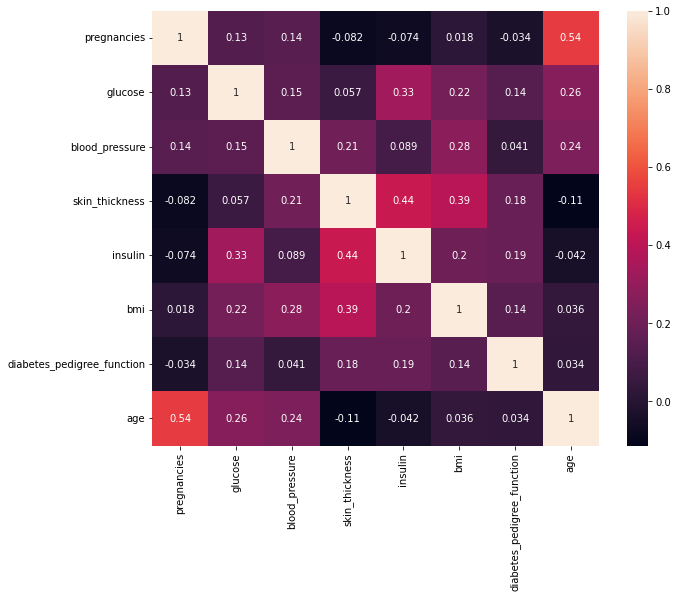

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True);

Ahora vamos a utilizar este método de `scikit learn` para dividir nuestro dataset en dos. Voy a entrenar un modelo para intentar predecir los niveles de insulina en una persona utilizando las variables 'glucose' y 'skin_thickness', así que mi variable dependiente será 'insulin' y mis variables independientes serán las otras dos.

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X = df[['glucose', 'skin_thickness']]
y = df['insulin']

In [54]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

Nota el tamaño del dataset de prueba (30% del total) y que estamos revolviendo el dataset aleatoriamente antes de realizar la división.

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lr = LinearRegression()
lr.fit(X_training, y_training)

LinearRegression()

In [57]:
lr.score(X_test, y_test)

0.313149977315331

Como puedes ver, nuestro R2 es menor incluso que los coeficientes de correlación que tienen ambas variables independientes con la dependiente. Esto significa que nuestra precisión no es necesariamente 'acumulativa'.

Mira lo que sucede si entrenamos nuestro modelo sin hacer la división de entrenamiento y prueba:

In [58]:
lr_2 = LinearRegression()
lr_2.fit(X, y)

LinearRegression()

In [59]:
lr_2.score(X, y)

0.28491868235030937

Obtenemos un score ligeramente mejor. Aunque en este caso no resulta tan relevante porque de todas maneras el poder predictivo es prácticamente nulo, nos demuestra que el modelo puede a veces aprender a predecir correctamente los datos que conoce y generalizar muy mal a datos que no conoce.

-------

In [60]:
print(f'intercepto: {lr.intercept_}')
print(f'b1: {lr.coef_[0]}')
print(f'b2: {lr.coef_[1]}')

intercepto: -121.18057031285694
b1: 1.1663685833856545
b2: 2.9314975539027492


In [61]:
import numpy as np
y_predict = lr.predict(np.array([[89, 23]]))
y_predict

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([50.05067735])

In [62]:
import numpy as np
y_predict = lr.predict([[89, 23]])
y_predict

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([50.05067735])

-----

## Reto 3: Dataset de entrenamiento y de prueba

### 1. Objetivos:
    - Aplicar la técnica de división del dataset en entrenamiento y prueba para entrenar un modelo de Regresión Linear Múltiple
 
---
    
### 2. Desarrollo:

Para este Reto vamos a utilizar el dataset 'wine_quality_red-clean.csv'. Este dataset tiene muchas variables numéricas. Realiza los procesos que se enumeran a continuación. Explica paso a paso tu proceso para que puedas presentarlo a los demás.

1. Explora las correlaciones que existen entre estas variables.
2. Elige dos o más variables independientes y una variable dependiente.
3. Explora las variables que elegiste para asegurarte de que estén limpias y de que no haya valores atípicos que puedan arruinar el modelo.
4. Separa tus datos en dataset de entrenamiento y prueba usando `scikit-learn`.
5. Entrena un modelo de Regresión Lineal Múltiple con tu dataset de entrenamiento.
6. Evalúa tu modelo usando el dataset de prueba.
7. Si crees que una combinación de variables pueda obtener mejor resultado, repite y el proceso.
8. Presenta tus hallazgos a tus compañeros.

In [64]:
df = pd.read_csv('/content/drive/MyDrive/BEDU2023F3/Remoto_Datasets/Remoto wine_quality_red-clean.csv', index_col = 0)
# Eliminamos la columna 'quality' para evitar confusiones en las correlaciones 
# (quality es una variable categorica)
df = df.drop(columns=['quality'])
print(df.info())
df.sample(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 149.9 KB
None


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
425,6.6,0.84,0.03,2.3,0.059,32.0,48.0,0.99520,3.52,0.56,12.3
222,6.8,0.61,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.5
784,7.1,0.59,0.01,2.5,0.077,20.0,85.0,0.99746,3.55,0.59,9.8


In [65]:
vars_3 = ['fixed_acidity', 'density', 'pH']
df_3 = df[vars_3]
df_3.sample(3)

,fixed_acidity,density,pH
1397,7.3,0.99584,3.28
688,7.7,0.99620,3.40
1473,6.1,0.99336,3.38


<Axes: >

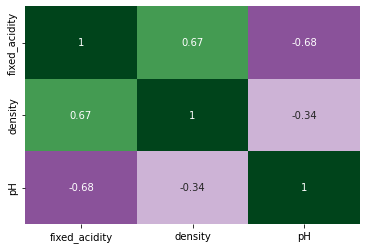

In [66]:
sns.heatmap(df_3.corr(), vmin = -1, vmax = 1, center = 0, cmap = 'PRGn', cbar = False, annot = True)

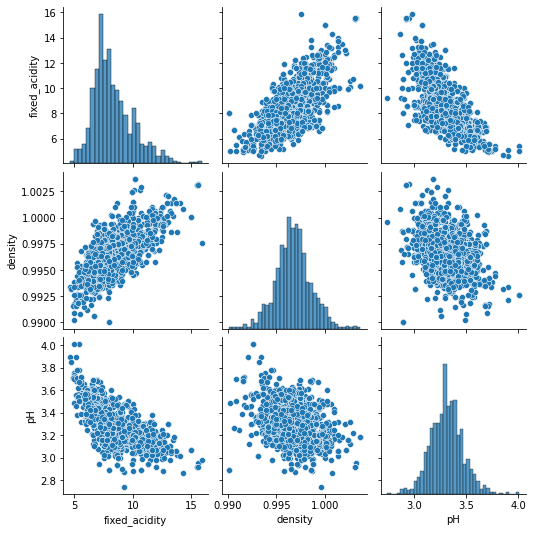

In [67]:
sns.pairplot(data = df_3)

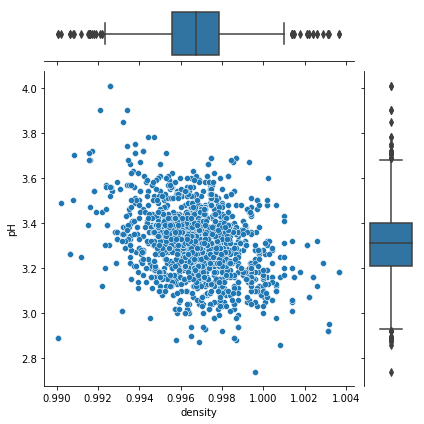

In [69]:
sns.JointGrid(data=df_3, x="density", y="pH")\
.plot(sns.scatterplot, sns.boxplot)

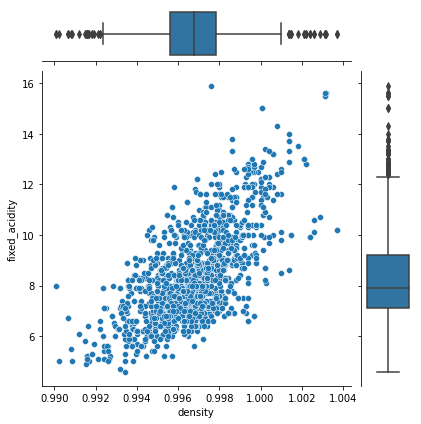

In [70]:
sns.JointGrid(data=df_3, x="density", y="fixed_acidity")\
.plot(sns.scatterplot, sns.boxplot)

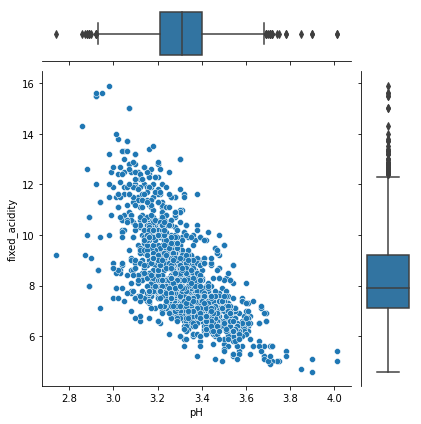

In [71]:
sns.JointGrid(data=df_3, x="pH", y="fixed_acidity")\
.plot(sns.scatterplot, sns.boxplot)

In [72]:
# Limpiar outliers en las variables independientes => density y pH

mask_1 = df_3['density'] > df_3['density'].quantile(0.025)
mask_2 = df_3['density'] < df_3['density'].quantile(0.975)
mask_3 = mask_1 & mask_2

mask_4 = df_3['pH'] > df_3['pH'].quantile(0.025)
mask_5 = df_3['pH'] < df_3['pH'].quantile(0.975)
mask_6 = mask_4 & mask_5

mask_7 = mask_3 & mask_6
df_clean_1 = df_3[mask_7]


# Eliminar outliers de "fixed_acidity"

df_clean_2 = df_3.query(f"fixed_acidity < {df_clean_1['fixed_acidity'].quantile(0.975)}")

In [73]:
# Crear modelos lineales
from sklearn.linear_model import LinearRegression

lr_split = LinearRegression()
lr_cv = LinearRegression()

In [74]:
# Separar independientes de dependiente
X = df_clean_2[vars_3[1:]]
y = df_clean_2[vars_3[0]]

In [75]:
# Usando split de datos
from sklearn.model_selection import train_test_split
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [76]:
# Entrenar
lr_split.fit(X_training, y_training)

LinearRegression()

In [77]:
# Score
lr_split.score(X_test, y_test)

0.6649193754612965

***
***






<ins>Validación cruzada</ins>

La validación cruzada lleva el método anterior aún más lejos, puesto que realiza múltiples divisiones, entrena el modelo múltiples veces usando combinaciones distintas de divisiones y evalúa al modelo usando el promedio de todos los entrenamientos.

>

[**`Ejemplo 4`**](Ejemplo-04/validacion_cruzada.ipynb)
[**`Reto 4`**](Reto-04/validacion_cruzada.ipynb)

---


## Ejemplo 4: Validación cruzada

### 1. Objetivos:
    - Aplicar la validación cruzada para evaluar un modelo predictivo
 
---
    
### 2. Desarrollo:

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('/content/drive/MyDrive/BEDU2023F3/Remoto_Datasets/Remoto diabetes-clean.csv', index_col=0)

df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [83]:
df = df.drop(columns=['outcome'])

In [84]:
X = df[['glucose', 'skin_thickness']]
y = df['insulin']

### Validación Cruzada de K-Iteraciones

Hay muchas maneras de aplicar esta técnica. El algoritmo que vamos a aprender hoy se llama Validación Cruzada de K-Iteraciones. Consta de los siguientes pasos:

1. Tomamos nuestro dataset y lo revolvemos aleatoriamente.

2. Decidimos un número `K` que va a ser el número de subdivisiones en el que vamos a dividir a nuestro dataset.

3. Para el primer entrenamiento, dejamos fuera la primera sección. Entrenamos usando la secciones restantes, probamos el modelo entrenado con la primera sección y evaluamos su desempeño.

4. Volvemos a entrenar nuestro modelo, pero esta vez dejando fuera la segunda sección como dataset prueba. Entrenamos, probamos con la segunda sección y evaluamos el desempeño del modelo.

5. Repetimos el proceso `K` veces. En cada iteración dejamos la sección siguiente como dataset de prueba.

6. Tomamos todas las evaluaciones de los `K` entrenamientos (que en el caso de una Regresión Lineal Múltiple podrían ser coeficientes de determinación) y sacamos el promedio y la desviación estándar. Esto servirá como una medida del "valor típico" de desempeño y la incertidumbre que tiene nuestro modelo.

In [85]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [86]:
scores = cross_validate(lr, X, y, scoring='r2')

In [87]:
scores

{'fit_time': array([0.00583291, 0.00360656, 0.0031786 , 0.00230026, 0.00221133]),
 'score_time': array([0.00180411, 0.00177217, 0.0016818 , 0.00138354, 0.00137329]),
 'test_score': array([0.36309888, 0.26517203, 0.29784786, 0.16315445, 0.26375667])}

Obtenemos la evaluación del modelo usando el promedio y la desviación estándar de los scores obtenidos:

In [88]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.271 +/- 0.065


## Reto 4: Validación Cruzada

### 1. Objetivos:
    - Aplicar la técnica de validación cruzada para evaluar un modelo de Regresión Lineal Múltiple
 
---
    
### 2. Desarrollo:

Para este Reto vamos a utilizar el mismo dataset que en el Reto anterior. Elige las variables con las que obtuviste un mejor resultado. Utilizando esas variables realiza los siguientes procesos:

1. Entrena un modelo de Regresión Lineal Múltiple utilizando validación cruzada de K-iteraciones.
2. Obtén el promedio de tus scores y el nivel de incertidumbre.
3. Compara tu resultado con el resultado obtenido en el Reto anterior.
4. Comparte tus hallazgos con tus compañeros.

In [90]:
df = pd.read_csv('/content/drive/MyDrive/BEDU2023F3/Remoto_Datasets/Remoto wine_quality_red-clean.csv', index_col = 0)
# Eliminamos la columna 'quality' para evitar confusiones en las correlaciones 
# (quality es una variable categorica)
df = df.drop(columns=['quality'])
print(df.info())
df.sample(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 149.9 KB
None


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
982,7.3,0.52,0.32,2.1,0.070,51.0,70.0,0.99418,3.34,0.82,12.9
276,6.9,0.54,0.04,3.0,0.077,7.0,27.0,0.99870,3.69,0.91,9.4
1424,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.99740,3.26,0.70,9.6


In [91]:
vars_3 = ['fixed_acidity', 'density', 'pH']
df_3 = df[vars_3]
df_3.sample(3)

,fixed_acidity,density,pH
48,6.4,0.99580,3.34
591,6.6,0.99220,3.12
1514,6.9,0.99842,3.53


<Axes: >

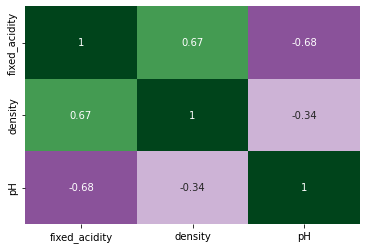

In [92]:
sns.heatmap(df_3.corr(), vmin = -1, vmax = 1, center = 0, cmap = 'PRGn', cbar = False, annot = True)

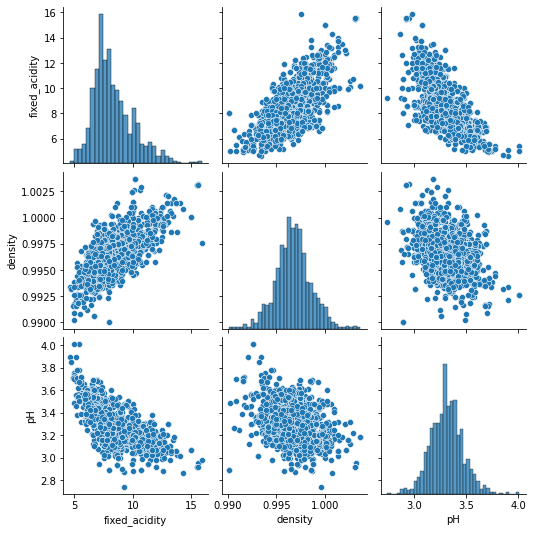

In [93]:
sns.pairplot(data = df_3)

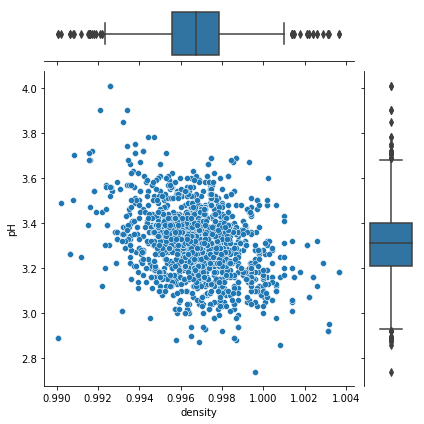

In [94]:
sns.JointGrid(data=df_3, x="density", y="pH")\
.plot(sns.scatterplot, sns.boxplot)

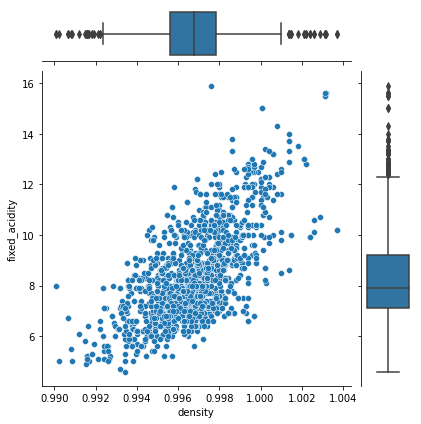

In [95]:
sns.JointGrid(data=df_3, x="density", y="fixed_acidity")\
.plot(sns.scatterplot, sns.boxplot)

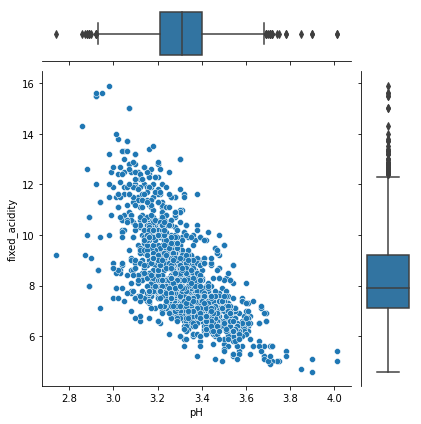

In [96]:
sns.JointGrid(data=df_3, x="pH", y="fixed_acidity")\
.plot(sns.scatterplot, sns.boxplot)

In [97]:
# Limpiar outliers en las variables independientes => density y pH

mask_1 = df_3['density'] > df_3['density'].quantile(0.025)
mask_2 = df_3['density'] < df_3['density'].quantile(0.975)
mask_3 = mask_1 & mask_2

mask_4 = df_3['pH'] > df_3['pH'].quantile(0.025)
mask_5 = df_3['pH'] < df_3['pH'].quantile(0.975)
mask_6 = mask_4 & mask_5

mask_7 = mask_3 & mask_6
df_clean_1 = df_3[mask_7]


# Eliminar outliers de "fixed_acidity"

df_clean_2 = df_3.query(f"fixed_acidity < {df_clean_1['fixed_acidity'].quantile(0.975)}")

In [98]:
# Crear modelos lineales
from sklearn.linear_model import LinearRegression

lr_split = LinearRegression()
lr_cv = LinearRegression()

In [99]:
# Separar independientes de dependiente
X = df_clean_2[vars_3[1:]]
y = df_clean_2[vars_3[0]]

In [100]:
# Usando split de datos
from sklearn.model_selection import train_test_split
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [101]:
# Entrenar
lr_split.fit(X_training, y_training)

LinearRegression()

In [102]:
# Score
lr_split.score(X_test, y_test)

0.6179407338517569

Aquí aplicamos la técnica de validación cruzada

In [103]:
# Ahora intentamos con CV
from sklearn.model_selection import cross_validate
scores = cross_validate(lr_cv, X, y, scoring='r2')

In [104]:
scores

{'fit_time': array([0.00368977, 0.0030427 , 0.00250149, 0.00266957, 0.00209951]),
 'score_time': array([0.00298715, 0.0013504 , 0.00127769, 0.00134611, 0.00122499]),
 'test_score': array([0.49475467, 0.51431387, 0.46003775, 0.51432018, 0.44924716])}

In [105]:
# Obtenemos la evaluacion
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.487 +/- 0.027


----
----
----

# **Retos** (otras formas de solución)

# Retos: El remix

### 1. Objetivos:

- Practicar la aplicación de los modelos y algoritmos de la sesión
 
---
    
### 2. Desarrollo:

En este Reto vamos a ver qué tan buenas predicciones podemos realizar entre pares de variables de nuestro dataset 'wine_quality_red-clean.csv'. Nuestros intentos en este momento van a ser bastante básicos, puesto que el mundo de las predicciones es tan vasto y complejo, que no hay manera de aprender todos los pequeños detalles durante este curso. Pero de todas maneras, lo que harás en este momento es un gran avance hacia desarrollar la capacidad de aplicar estas herramientas en el mundo real.

Realiza los siguientes pasos:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/jaeem006/beduadp/master/Datasets/wine_quality_red-clean.csv", index_col = 0)
# Eliminamos la columna 'quality' para evitar confusiones en las correlaciones 
# (quality es una variable categorica)
df = df.drop(columns=['quality'])
print(df.info())
df.sample(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 149.9 KB
None


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
441,11.9,0.40,0.65,2.15,0.068,7.0,27.0,0.9988,3.06,0.68,11.3
536,9.9,0.63,0.24,2.40,0.077,6.0,33.0,0.9974,3.09,0.57,9.4
1281,7.1,0.46,0.20,1.90,0.077,28.0,54.0,0.9956,3.37,0.64,10.4


### Bootstrap 

9. Elige una variable numérica. 
10. Si no lo haz hecho aún, grafica tu variable usando un histograma y un boxplot, para que tengas una idea más detallada de su distribucióny si consideras que hay valores atípicos, lidia con ellos de la manera que te parezca más adecuada.
11. Ahora vamos a ver qué tanta incertidumbre y sesgo hay en tus hallazgos. Vamos a aplicar la técnica de bootstrap 3 veces:

  a) Realiza 100 000 remuestreos, cada uno de 5 elementos. Obtén la medida estadística que te interese de cada muestra y guarda los resultados en una lista.
  
  b) Repite el mismo proceso, pero esta vez con remuestreos con longitud de 20% del total de los datos.
  
  c) Repite una vez más, pero esta vez cada nueva muestra tendrá una longitud de 90% de la original.
  
12. Grafica cada una de las listas resultantes en un histograma.
13. Obtén la asimetría y curtosis de cada una y compáralas entre ellas. ¿Cuál es más similar a una distribución normal? ¿Qué diferencias tienen entre ellas?
14. Ahora, obtén el error estándar de ambas medidas estadísticas. Utiliza el mínimo, el máximo y el rango para contextualizar tu error estándar y saber qué tan grande o pequeño es.
15. Ahora, para cada medida estadística obtén los intervalos de confianza de 90%, 95% y 99%. Compara los resultados.

In [3]:
# Elegir variable numerica
datos_alcohol = df['alcohol']

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64


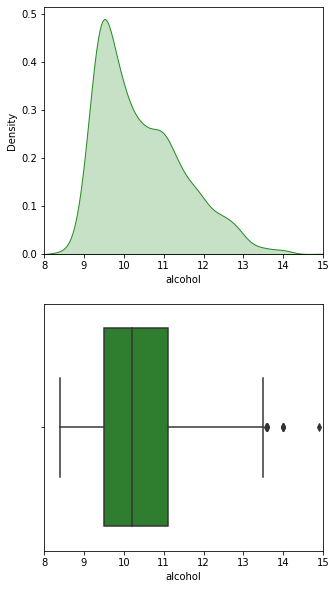

In [4]:
# Explorar variable
print(datos_alcohol.describe())
fig, (ax1,ax2) = plt.subplots(figsize = (5,10), nrows=2)

sns.kdeplot(x=datos_alcohol, color = 'forestgreen', fill = True, ax = ax1)
sns.boxplot(x=datos_alcohol, color = 'forestgreen', ax = ax2)

ax1.set_xlim(xmin = 8, xmax = 15)
ax2.set_xlim(xmin = 8, xmax = 15)

plt.show()

Por decisión propia, voy a continuar sin modificar los datos

In [5]:
def bootstrap(series, size, iter = 100_000):
    lista_means = []
    if size > 1:
        for i in range(iter):
            sample = series.sample(n = size, replace = True)
            lista_means.append(sample.mean())
        return pd.Series(lista_means)
    else:
        n_datos = int(len(series) * size)
        for i in range(iter):
            sample = series.sample(n = n_datos, replace = True)
            lista_means.append(sample.mean())
        return pd.Series(lista_means)

In [6]:
series_means_5 = bootstrap(series = datos_alcohol, size = 5)
series_means_20_perc = bootstrap(series = datos_alcohol, size = 0.2)
series_means_90_perc = bootstrap(series = datos_alcohol, size = 0.9)

Text(11.15, 3000, 'Proporcion de\nerror estandar: 11.82728%')

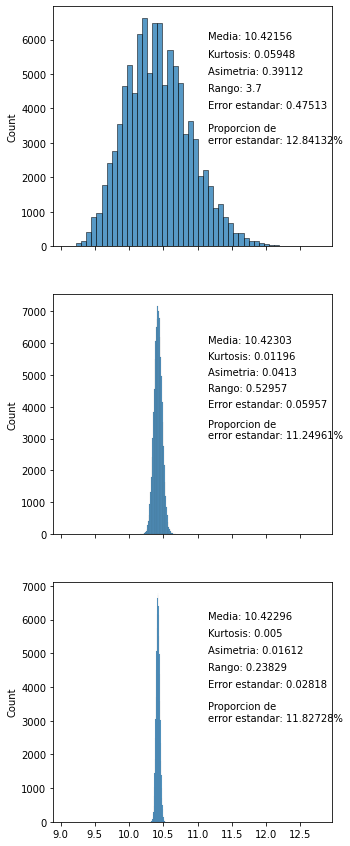

In [7]:
# Graficar resultados e información de los bootstrap
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize = (5,15), sharex=True)

sns.histplot(x = series_means_5, bins = 50,
             ax = ax1)
sns.histplot(x = series_means_20_perc, bins = 50, 
             ax = ax2)
sns.histplot(x = series_means_90_perc, bins = 50,
             ax = ax3)


ax1.text(x = 11.15, y = 6_000, s = f"Media: {round(series_means_5.mean(),5)}")
ax1.text(x = 11.15, y = 5_500, s = f"Kurtosis: {round(series_means_5.kurtosis(),5)}")
ax1.text(x = 11.15, y = 5_000, s = f"Asimetria: {round(series_means_5.skew(),5)}")
ax1.text(x = 11.15, y = 4_500, s = f"Rango: {round(series_means_5.max() - series_means_5.min(),5)}")
ax1.text(x = 11.15, y = 4_000, s = f"Error estandar: {round(series_means_5.std(),5)}")
ax1.text(x = 11.15, y = 3_000, s = f"Proporcion de\nerror estandar: {round(100 * (series_means_5.std()/(series_means_5.max() - series_means_5.min())),5)}%")

ax2.text(x = 11.15, y = 6_000, s = f"Media: {round(series_means_20_perc.mean(),5)}")
ax2.text(x = 11.15, y = 5_500, s = f"Kurtosis: {round(series_means_20_perc.kurtosis(),5)}")
ax2.text(x = 11.15, y = 5_000, s = f"Asimetria: {round(series_means_20_perc.skew(),5)}")
ax2.text(x = 11.15, y = 4_500, s = f"Rango: {round(series_means_20_perc.max() - series_means_20_perc.min(),5)}")
ax2.text(x = 11.15, y = 4_000, s = f"Error estandar: {round(series_means_20_perc.std(),5)}")
ax2.text(x = 11.15, y = 3_000, s = f"Proporcion de\nerror estandar: {round(100 * (series_means_20_perc.std()/(series_means_20_perc.max() - series_means_20_perc.min())),5)}%")

ax3.text(x = 11.15, y = 6_000, s = f"Media: {round(series_means_90_perc.mean(),5)}")
ax3.text(x = 11.15, y = 5_500, s = f"Kurtosis: {round(series_means_90_perc.kurtosis(),5)}")
ax3.text(x = 11.15, y = 5_000, s = f"Asimetria: {round(series_means_90_perc.skew(),5)}")
ax3.text(x = 11.15, y = 4_500, s = f"Rango: {round(series_means_90_perc.max() - series_means_90_perc.min(),5)}")
ax3.text(x = 11.15, y = 4_000, s = f"Error estandar: {round(series_means_90_perc.std(),5)}")
ax3.text(x = 11.15, y = 3_000, s = f"Proporcion de\nerror estandar: {round(100 * (series_means_90_perc.std()/(series_means_90_perc.max() - series_means_90_perc.min())),5)}%")

In [8]:
def intervalo_de_confianza(series, confianza = 0.95):
    alpha = round((1-confianza)/2,5)
    limite_inf = series.quantile(alpha)
    limite_sup = series.quantile(1 - alpha)
    print(f"Intervalo de {confianza * 100}% confianza de la media: {limite_inf} < {series.mean()} < {limite_sup}")

In [9]:
print("Para el muestreo de 5 elementos")
intervalo_de_confianza(series = series_means_5, confianza=0.90)
intervalo_de_confianza(series = series_means_5, confianza=0.95)
intervalo_de_confianza(series = series_means_5, confianza=0.99)

print("\nPara el muestreo de 20%")
intervalo_de_confianza(series = series_means_20_perc, confianza=0.90)
intervalo_de_confianza(series = series_means_20_perc, confianza=0.95)
intervalo_de_confianza(series = series_means_20_perc, confianza=0.99)

print("\nPara el muestreo de 90%")
intervalo_de_confianza(series = series_means_90_perc, confianza=0.90)
intervalo_de_confianza(series = series_means_90_perc, confianza=0.95)
intervalo_de_confianza(series = series_means_90_perc, confianza=0.99)

Para el muestreo de 5 elementos
Intervalo de 90.0% confianza de la media: 9.7 < 10.4215575 < 11.26
Intervalo de 95.0% confianza de la media: 9.6 < 10.4215575 < 11.44
Intervalo de 99.0% confianza de la media: 9.42 < 10.4215575 < 11.780000000000001

Para el muestreo de 20%
Intervalo de 90.0% confianza de la media: 10.32601880877743 < 10.423030112852667 < 10.521734587251828
Intervalo de 95.0% confianza de la media: 10.307523510971787 < 10.423030112852667 < 10.54075235109718
Intervalo de 99.0% confianza de la media: 10.27115987460815 < 10.423030112852667 < 10.577952455590388

Para el muestreo de 90%
Intervalo de 90.0% confianza de la media: 10.376685198054204 < 10.422957913713226 < 10.469457956914523
Intervalo de 95.0% confianza de la media: 10.368033066944635 < 10.422957913713226 < 10.478410933518647
Intervalo de 99.0% confianza de la media: 10.350312717164698 < 10.422957913713226 < 10.495865242066252


### Regresión Lineal multiple

16. Explora las correlaciones que existen entre las variables del dataset.
17. Elige dos o más variables independientes y una variable dependiente.
18. Explora las variables que elegiste para asegurarte de que estén limpias y de que no haya valores atípicos que puedan arruinar el modelo.
19. Separa tus datos en dataset de entrenamiento y prueba usando `scikit-learn`.
20. Entrena un modelo de Regresión Lineal Múltiple con tu dataset de entrenamiento.
21. Evalúa tu modelo usando el dataset de prueba.
22. Si crees que una combinación de variables pueda obtener mejor resultado, repite y el proceso.
23. Entrena un modelo de Regresión Lineal Múltiple utilizando validación cruzada de K-iteraciones.
24. Obtén el promedio de tus scores y el nivel de incertidumbre.
25. Compara tu resultado con el resultado obtenido en el punto 21.

In [10]:
vars_3 = ['fixed_acidity', 'density', 'pH']
df_3 = df[vars_3]
df_3.sample(3)

,fixed_acidity,density,pH
927,8.4,0.99736,3.20
1107,9.1,0.99523,3.27
339,12.5,0.99970,3.11


<Axes: >

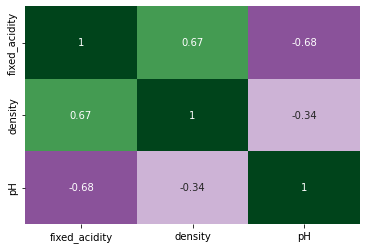

In [11]:
sns.heatmap(df_3.corr(), vmin = -1, vmax = 1, center = 0, cmap = 'PRGn', cbar = False, annot = True)

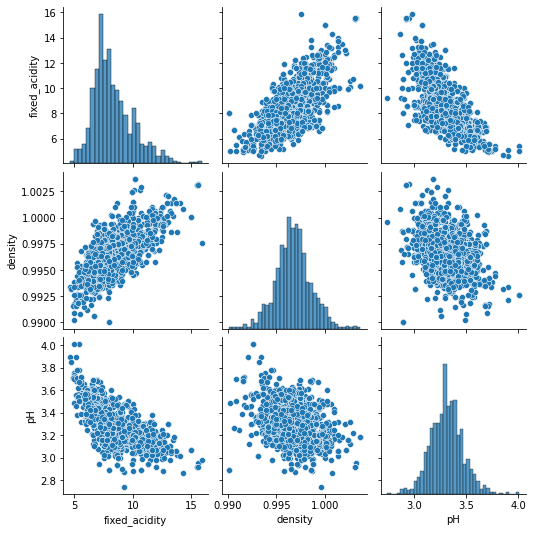

In [12]:
sns.pairplot(data = df_3)

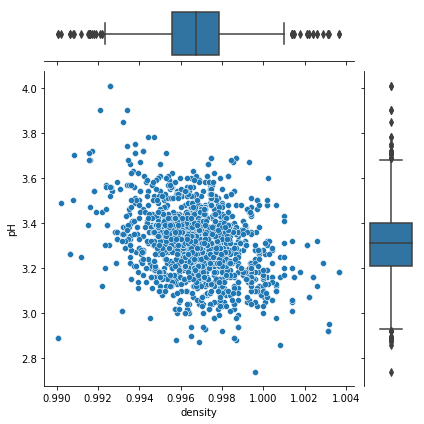

In [13]:
sns.JointGrid(data=df_3, x="density", y="pH")\
.plot(sns.scatterplot, sns.boxplot)

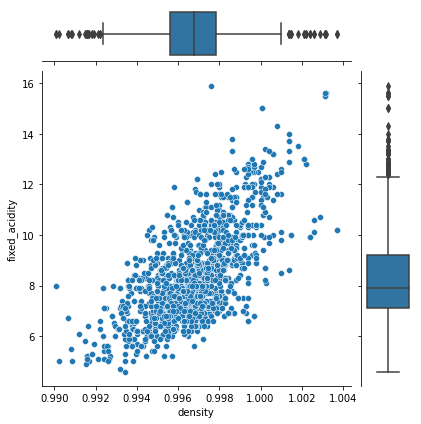

In [14]:
sns.JointGrid(data=df_3, x="density", y="fixed_acidity")\
.plot(sns.scatterplot, sns.boxplot)

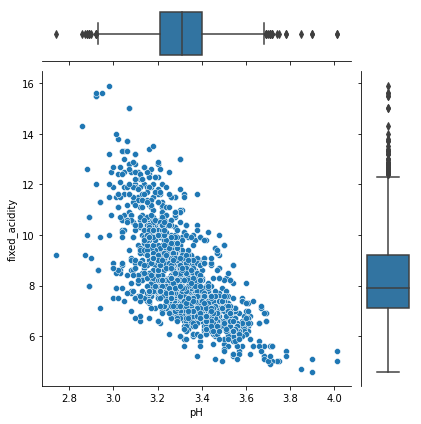

In [15]:
sns.JointGrid(data=df_3, x="pH", y="fixed_acidity")\
.plot(sns.scatterplot, sns.boxplot)

In [16]:
# Limpiar outliers en las variables independientes => density y pH

mask_1 = df_3['density'] > df_3['density'].quantile(0.025)
mask_2 = df_3['density'] < df_3['density'].quantile(0.975)
mask_3 = mask_1 & mask_2

mask_4 = df_3['pH'] > df_3['pH'].quantile(0.025)
mask_5 = df_3['pH'] < df_3['pH'].quantile(0.975)
mask_6 = mask_4 & mask_5

mask_7 = mask_3 & mask_6
df_clean_1 = df_3[mask_7]


# Eliminar outliers de "fixed_acidity"

df_clean_2 = df_3.query(f"fixed_acidity < {df_clean_1['fixed_acidity'].quantile(0.975)}")

In [17]:
# Crear modelos lineales
from sklearn.linear_model import LinearRegression

lr_split = LinearRegression()
lr_cv = LinearRegression()

In [18]:
# Separar independientes de dependiente
X = df_clean_2[vars_3[1:]]
y = df_clean_2[vars_3[0]]

In [19]:
# Usando split de datos
from sklearn.model_selection import train_test_split
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [20]:
# Entrenar
lr_split.fit(X_training, y_training)

LinearRegression()

In [21]:
# Score
lr_split.score(X_test, y_test)

0.60052803725624

In [22]:
# Ahora intentamos con CV
from sklearn.model_selection import cross_validate
scores = cross_validate(lr_cv, X, y, scoring='r2')

In [23]:
scores

{'fit_time': array([0.01282597, 0.00275135, 0.00272608, 0.00545812, 0.00307989]),
 'score_time': array([0.0022459 , 0.00157261, 0.00155473, 0.00230908, 0.00164795]),
 'test_score': array([0.49475467, 0.51431387, 0.46003775, 0.51432018, 0.44924716])}

In [24]:
# Obtenemos la evaluacion
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.487 +/- 0.027


***
***
***

## **Postwork**

 ## Nombre del Postwork: Distribuciones muestrales y técnicas de evaluación de modelos

### OBJETIVO 

- Explorar las distribuciones muestrales de estadísticas de las variables numéricas en nuestro dataset
- Practicar el entrenamiento de modelos de Regresión Lineal Múltiple

#### REQUISITOS 

- Tener un dataset que contenga variables numéricas

#### DESARROLLO

En este Postwork vamos a analizar la incertidumbre y los sesgos que existen en las medidas de locación y dispersión de nuestras variables numéricas. También vamos a practicar el entrenamiento de modelos de Regresión Lineal Múltiple, aunque eso no sea el objetivo de tu proyecto. Realiza los siguientes pasos:

1. Identifica las variables numéricas en tu dataset y revisa las medidas de locación y dispersión que ya has realizado de ellas.
2. Utilizando la técnica de bootstrap, explora las distribuciones muestrales de las estadísticas que obtuviste anteriormente y reporta:

  a) La distribución, su asimetría y curtosis
  
  b) El error estándar
  
  c) El intervalo de confianza que te parezca más apropiado
  
3. Si tiene sentido, elige algunas de tus variables numéricas para entrenar uno o más modelos de Regresión Lineal Múltiple. Utiliza las técnicas de división de dataset y validación cruzada de K-iteraciones para asegurarte de que tu modelo generalice.
4. Comparte con tus compañeros y la experta tus hallazgos.

¡Mucha suerte!